In [137]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import os
import pandas as pd

In [138]:
file_to_load = "resources/longterm.csv"
fileload = "output/index.csv"


In [139]:
longterm = pd.read_csv(file_to_load, encoding='UTF-8')
longterm.head(5)

,X,Y,FID,OGF_ID,MOH_PRO_ID,SERV_TYPE,SERV_DET,EN_NAME,FR_NAME,EN_ALT,FR_ALT,ADDRESS_1,ADDRESS_2,ADDR_DESCR,COMMUNITY,POSTALCODE,GEO_UPT_DT,EFF_DATE
0,-79.567456,43.643881,36,172388779,M612,Long-Term Care Home,Non-Profit,Wesburn Manor,,,,400 The West Mall,,,Toronto,M9C5S1,20220428135916,20220426155142
1,-79.482275,43.717533,41,172388555,909,Long-Term Care Home,For-Profit,North Park Nursing Home,,,,450 Rustic Road,,,Toronto,M6L1W9,20220428140056,20220426155113
2,-78.743990,44.338684,64,172388761,M589,Long-Term Care Home,Non-Profit,Victoria Manor Home for the Aged,,,,220 Angeline Street South,,,Kawartha Lakes,K9V4R2,20220428140040,20220426155140
3,-79.921456,43.237253,130,172388343,2858,Long-Term Care Home,For-Profit,Extendicare Hamilton,,,,90 Chedmac Drive,,,Hamilton,L9C7S6,20220428140002,20220426155045
4,-79.567768,43.737277,135,172388787,2663,Long-Term Care Home,For-Profit,Westside,,,,1145 Albion Road,,,Toronto,M9V4J7,20220428140057,20220426155143


In [140]:
index = pd.read_csv(fileload, encoding='UTF-8')
index.head(5)

,City,Number of Retirement Homes
0,Ottawa,80
1,Toronto,76
2,Hamilton,33
3,Mississauga,23
4,London,20


In [141]:
cleaned_df = longterm[['SERV_TYPE', 'COMMUNITY','SERV_DET']]
cleaned_df.head()

,SERV_TYPE,COMMUNITY,SERV_DET
0,Long-Term Care Home,Toronto,Non-Profit
1,Long-Term Care Home,Toronto,For-Profit
2,Long-Term Care Home,Kawartha Lakes,Non-Profit
3,Long-Term Care Home,Hamilton,For-Profit
4,Long-Term Care Home,Toronto,For-Profit


In [142]:
cleaned_df["COMMUNITY"].unique()

array(['Toronto', 'Kawartha Lakes', 'Hamilton', 'Ingersoll', 'Belleville',
       'Manitouwadge', 'Vaughan', 'Windsor', 'Newmarket', 'Georgina',
       'Carleton Place', 'Midland', 'Guelph', 'Richmond Hill',
       'Greater Sudbury', 'Brockville', 'Orillia', 'Cannington',
       'Little Current', 'Fort Erie', 'St. Catharines', 'Strathroy',
       'Aurora', 'Kenora', 'Brighton', 'Smiths Falls', 'Port Perry',
       'Napanee', 'Norwood', 'Haliburton', 'Ottawa', 'Amherstview',
       'Welland', 'Temiskaming Shores', 'Barrie', 'Perth', 'Kitchener',
       'Cochrane', 'Delaware', 'North Bay', 'Mississauga', 'Blind River',
       'Brussels', 'Oakville', 'Cobourg', 'Ailsa Craig', 'Townsend',
       'Tecumseh', 'Penetanguishene', 'Chesley', 'Burlington',
       'Saint Marys', 'Cambridge', 'Aylmer', 'Grimsby', 'Pickering',
       'Bracebridge', 'Chatham', 'Quinte West', 'Brampton', 'King City',
       'Hanover', 'Parkhill', 'Hawkesbury', 'Watford', 'Lincoln',
       'West Nipissing', 'Bolton', 

In [143]:
renames = cleaned_df.rename(columns={'COMMUNITY': 'City', 'SERV_DET': 'Sector', 'SERV_TYPE' : 'Service'})
renames.head(20)

,Service,City,Sector
0,Long-Term Care Home,Toronto,Non-Profit
1,Long-Term Care Home,Toronto,For-Profit
2,Long-Term Care Home,Kawartha Lakes,Non-Profit
3,Long-Term Care Home,Hamilton,For-Profit
4,Long-Term Care Home,Toronto,For-Profit
5,Long-Term Care Home,Ingersoll,Non-Profit
6,Long-Term Care Home,Belleville,For-Profit
7,Long-Term Care Home,Manitouwadge,Non-Profit
8,Long-Term Care Home,Vaughan,Non-Profit
9,Long-Term Care Home,Toronto,Non-Profit


In [144]:
long_statistics = cleaned_df.groupby('COMMUNITY')


In [145]:
longterm_count = long_statistics["COMMUNITY"].count().sort_values(ascending = False)
longterm_count.head(20)


COMMUNITY
Toronto            84
Ottawa             28
Hamilton           27
Mississauga        15
London             15
Brampton           11
Burlington         10
Windsor            10
Barrie              9
St. Catharines      9
Cambridge           8
Kawartha Lakes      8
Vaughan             7
Greater Sudbury     7
Kitchener           7
Sarnia              6
Niagara Falls       6
Thunder Bay         6
Kingston            6
Oakville            5
Name: COMMUNITY, dtype: int64

In [146]:
longterm_count.to_csv('output/longterm_count.csv')

In [147]:
#loadz = "output/longterm_count.csv"

In [148]:
#longplot  = pd.read_csv(loadz)
#longplot.head(10)

In [149]:
#cleanz = longplot.rename(columns={'COMMUNITY': 'City', 'COMMUNITY.1' : 'Number of Long-Term Care Homes'})
#cleanz.head(20)

In [150]:
sector = renames["Sector"].count()
sector

627

In [151]:
specific_sector = renames.groupby('Sector')['Sector'].count()
specific_sector

Sector
CHFA               1
For-Profit       352
MHFA               1
NH non-profit      2
Non-Profit       271
Name: Sector, dtype: int64

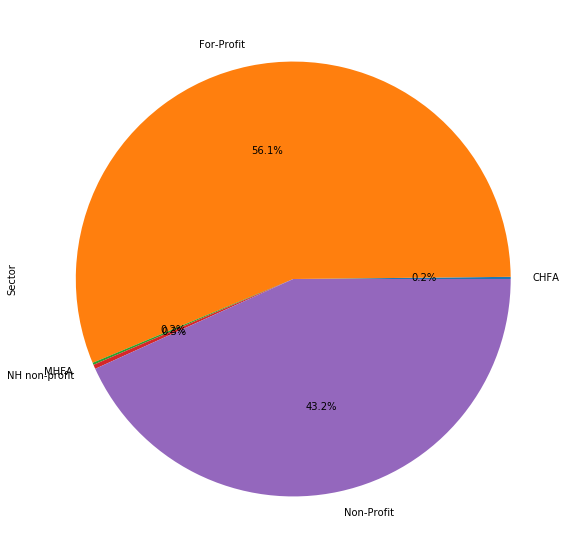

In [152]:
sectorplot_pie = specific_sector.plot(kind='pie',figsize= (10,10), autopct="%1.1f%%")
plt.savefig("output/sector.png")
plt.show()

In [153]:
loadz = "output/longterm_count.csv"

In [154]:
longplot  = pd.read_csv(loadz)
longplot.head(10)

,COMMUNITY,COMMUNITY.1
0,Toronto,84
1,Ottawa,28
2,Hamilton,27
3,Mississauga,15
4,London,15
5,Brampton,11
6,Burlington,10
7,Windsor,10
8,Barrie,9
9,St. Catharines,9


In [155]:
cleanz = longplot.rename(columns={'COMMUNITY': 'City', 'COMMUNITY.1' : 'Number of Long-Term Care Homes'})
cleanz.head(10)

,City,Number of Long-Term Care Homes
0,Toronto,84
1,Ottawa,28
2,Hamilton,27
3,Mississauga,15
4,London,15
5,Brampton,11
6,Burlington,10
7,Windsor,10
8,Barrie,9
9,St. Catharines,9


In [156]:
homes_df = pd.merge(cleanz,index,how="left",on=["City","City"])
homes_df.head(10)

,City,Number of Long-Term Care Homes,Number of Retirement Homes
0,Toronto,84,76.0
1,Ottawa,28,80.0
2,Hamilton,27,33.0
3,Mississauga,15,23.0
4,London,15,20.0
5,Brampton,11,8.0
6,Burlington,10,11.0
7,Windsor,10,12.0
8,Barrie,9,12.0
9,St. Catharines,9,10.0


In [162]:
indexX = homes_df.set_index('City')
indexX.head(10)

,Number of Long-Term Care Homes,Number of Retirement Homes
City,,
Toronto,84,76.0
Ottawa,28,80.0
Hamilton,27,33.0
Mississauga,15,23.0
London,15,20.0
Brampton,11,8.0
Burlington,10,11.0
Windsor,10,12.0
Barrie,9,12.0


In [157]:
load3 = "resources/costofliving.csv"

In [158]:
livingcost = pd.read_csv(load3, encoding='UTF-8')
livingcost.head(5)

,Type of accommodation,Daily rate,Monthly rate
0,Long-stay Basic,$63.73,"$1,938.46"
1,Long-stay Semi-private,$76.83,"$2,336.92"
2,Long-stay Private,$91.04,"$2,769.14"
3,Short-stay,$41.25,NaN


In [159]:
livingcosts = livingcost.fillna("")
livingcosts

,Type of accommodation,Daily rate,Monthly rate
0,Long-stay Basic,$63.73,"$1,938.46"
1,Long-stay Semi-private,$76.83,"$2,336.92"
2,Long-stay Private,$91.04,"$2,769.14"
3,Short-stay,$41.25,


In [160]:
renamecost = livingcosts.rename(columns={'Type of accommodation': 'Long-Term Care Home Types'})
renamecost.head(10)

,Long-Term Care Home Types,Daily rate,Monthly rate
0,Long-stay Basic,$63.73,"$1,938.46"
1,Long-stay Semi-private,$76.83,"$2,336.92"
2,Long-stay Private,$91.04,"$2,769.14"
3,Short-stay,$41.25,
